Business goal:

Check the case_study_gnod.md file.

Make sure you've understood the big picture of your project:

the goal of the company (Gnod),
their current product (Gnoosic),
their strategy, and
how your project fits into this context.
Re-read the business case and the e-mail from the CTO, take a look at the flowchart and create an initial Trello board with the tasks you think you'll have to accomplish.

Instructions - Scraping popular songs
Your product will take a song as an input from the user and will output another song (the recommendation). In most cases, the recommended song will have to be similar to the inputted song, but the CTO thinks that if the song is on the top charts at the moment, the user will enjoy more a recommendation of a song that's also popular at the moment.

You have find data on the internet about currently popular songs. Billboard maintains a weekly Top 100 of "hot" songs here: https://www.billboard.com/charts/hot-100.

It's a good place to start! Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.

In [138]:
!pip install bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [141]:
url = "https://www.billboard.com/charts/hot-100"

In [142]:
r = requests.get("https://www.billboard.com/charts/hot-100")
r.status_code

200

In [143]:
html = r.content

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <!-- Add to home screen for iOS -->
   <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
   <link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
   <!-- Tile icons for Windows -->
   <meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
   <meta content="https://www.billboard.com/wp
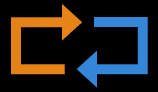

In [144]:
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

In [145]:
songs_divs = soup.find_all('h3', class_="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" )

artists_spans = soup.find_all('span', class_='c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only')

In [7]:
artists_spans

[<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Benson Boone
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Ariana Grande
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Jack Harlow
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 

In [146]:
song_names = []
artist_names = []

In [147]:
for song_div, artist_span in zip(songs_divs, artists_spans):
    song_name = song_div.text.strip() 
    artist_name = artist_span.text.strip()
    song_names.append(song_name)
    artist_names.append(artist_name)

df = pd.DataFrame({'Song': song_names, 'Artist': artist_names})

df.head(100)

,Song,Artist
0,Beautiful Things,Benson Boone
1,We Can't Be Friends (Wait For Your Love),Ariana Grande
2,Lovin On Me,Jack Harlow
3,Carnival,¥$: Ye & Ty Dolla $ign Featuring Rich The Kid ...
4,Texas Hold 'Em,Beyonce
...,...,...
94,We Ride,Bryan Martin
95,Tourniquet,Zach Bryan
96,Gata Only,FloyyMenor X Cris Mj
97,Igual Que Un Angel,Kali Uchis & Peso Pluma


### Business goal:

Check the case_study_gnod.md file.

Make sure you've understood the big picture of your project:


the goal of the company (Gnod),

their current product (Gnoosic),

their strategy, and

how your project fits into this context.

Re-read the business case and the e-mail from the CTO, take a look at the flowchart and create an initial Trello board with the tasks you think you'll have to accomplish.

### Instructions:

#### Prioritize the MVP

In the previous lab, you had to scrape data about "hot songs". It's critical to be on track with that part, as it was part of the request from the CTO.

If you couldn't finish the first lab, use this time to go back there.

#### Expand the project

If you're done, you can try to expand the project on your own. Here are a few suggestions:

Find other lists of hot songs on the internet and scrape them too: having a bigger pool of songs will be awesome!

Apply the same logic to other "groups" of songs: the best songs from a decade or from a country / culture / language / genre.

Wikipedia maintains a large collection of lists of songs: https://en.wikipedia.org/wiki/Lists_of_songs

#### Practice web scraping

As you've seen, scraping the internet is a skill that can get you all sorts of information. Here are some little challenges that you can try to gain more experience in the field:

Retrieve an arbitrary Wikipedia page of "Python" and create a list of links on that page: url ='https://en.wikipedia.org/wiki/Python'

Find the number of titles that have changed in the United States Code since its last release point: url = 'http://uscode.house.gov/download/download.shtml'

Create a Python list with the top ten FBI's Most Wanted names: url = 'https://www.fbi.gov/wanted/topten'

Display the 20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe: url = 'https://www.emsc-csem.org/Earthquake/'

List all language names and number of related articles in the order they appear in wikipedia.org: url = 'https://www.wikipedia.org/'

A list with the different kind of datasets available in data.gov.uk: url = 'https://data.gov.uk/'

Display the top 10 languages by number of native speakers stored in a pandas dataframe: url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [60]:
website1 = 'https://en.wikipedia.org/wiki/Lists_of_songs'

In [61]:
response = requests.get("https://en.wikipedia.org/wiki/Lists_of_songs")
response.status_code

200

In [62]:
html2 = response.content
html2

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Lists of songs - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled

In [63]:
url2_soup = BeautifulSoup(html2, 'html.parser')
url2_soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Lists of songs - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vect

In [73]:
# artists_names_list = []

In [100]:
table_artists = soup.find('div', class_='div-col')

In [76]:
table_artists

<div class="div-col" style="column-width: 30em;">
<ul><li><a href="/wiki/List_of_songs_recorded_by_Arijit_Singh" title="List of songs recorded by Arijit Singh">List of songs recorded by Arijit Singh</a></li>
<li><a href="/wiki/List_of_songs_recorded_by_2PM" title="List of songs recorded by 2PM">List of songs recorded by 2PM</a></li>
<li><a class="mw-redirect" href="/wiki/List_of_songs_recorded_by_311" title="List of songs recorded by 311">List of songs recorded by 311</a></li>
<li><a href="/wiki/List_of_songs_recorded_by_4Minute" title="List of songs recorded by 4Minute">List of songs recorded by 4Minute</a></li>
<li><a class="mw-redirect" href="/wiki/List_of_songs_recorded_by_911" title="List of songs recorded by 911">List of songs recorded by 911</a></li>
<li><a href="/wiki/List_of_songs_recorded_by_A-Teens" title="List of songs recorded by A-Teens">List of songs recorded by A-Teens</a></li>
<li><a href="/wiki/List_of_songs_recorded_by_Aaliyah" title="List of songs recorded by Aaliya

In [79]:
if table_artists:
    artists_names_list = []
    artist_list_items = table_artists.find_all('li')
    for li in artist_list_items:
        artist_name = li.text.strip()
        artists_names_list.append(artist_name)

In [80]:
artists_names_list

['List of songs recorded by Arijit Singh',
 'List of songs recorded by 2PM',
 'List of songs recorded by 311',
 'List of songs recorded by 4Minute',
 'List of songs recorded by 911',
 'List of songs recorded by A-Teens',
 'List of songs recorded by Aaliyah',
 'List of songs recorded by Adele',
 'List of songs recorded by Aerosmith',
 'List of songs recorded by Ariana Grande',
 'List of songs recorded by Die Ärzte',
 'List of songs recorded by After School',
 'List of songs recorded by Christina Aguilera',
 'List of songs recorded by AKB48',
 'List of songs recorded by Fiona Apple',
 'List of songs recorded by Arch Enemy',
 'List of songs recorded by Arctic Monkeys',
 'List of songs recorded by Badlees',
 'List of songs recorded by Syd Barrett',
 'List of songs recorded by the Beach Boys',
 'List of songs recorded by Beady Eye',
 'List of songs recorded by the Beatles',
 'List of songs recorded by the Bee Gees',
 'List of songs recorded by Belinda',
 'Drake discography',
 'List of songs

In [83]:
# genere_names = []

In [101]:
div_col_blocks = soup.find_all('div', class_='div-col')
print(len(div_col_blocks)) 

27


In [103]:
print(type(div_col_blocks))

<class 'bs4.element.ResultSet'>


In [132]:
genere_block = div_col_blocks[2]
genere_block

<div class="div-col" style="column-width: 30em;">
<ul><li><a href="/wiki/Christmas_music" title="Christmas music">Christmas music</a></li>
<li><a href="/wiki/List_of_calypsos_with_sociopolitical_influences" title="List of calypsos with sociopolitical influences">List of calypsos with sociopolitical influences</a></li>
<li><a href="/wiki/List_of_Eurodance_songs" title="List of Eurodance songs">List of Eurodance songs</a></li>
<li><a class="mw-redirect" href="/wiki/List_of_Hi-NRG_artists_and_songs" title="List of Hi-NRG artists and songs">List of Hi-NRG artists and songs</a></li>
<li><a href="/wiki/The_History_of_Rock_and_Roll_contents" title="The History of Rock and Roll contents">The History of Rock and Roll contents</a></li>
<li><a href="/wiki/List_of_Italo_disco_artists_and_songs" title="List of Italo disco artists and songs">List of Italo disco artists and songs</a></li>
<li><a class="mw-redirect" href="/wiki/List_of_jazz_standards_(disambiguation)" title="List of jazz standards (di

In [133]:
if genere_block:
    genere_names = []
    genere_items = genere_block.find_all('li')
    for li in genere_items:
        gn_name = li.text.strip()
        genere_names.append(gn_name)

In [134]:
genere_names

['Christmas music',
 'List of calypsos with sociopolitical influences',
 'List of Eurodance songs',
 'List of Hi-NRG artists and songs',
 'The History of Rock and Roll contents',
 'List of Italo disco artists and songs',
 'List of jazz standards',
 'List of Latin freestyle musicians and songs',
 'List of mashup songs',
 'List of murder ballads',
 'List of post-disco artists and songs',
 'List of power pop artists and songs',
 'List of quiet storm songs',
 'List of rock instrumentals',
 'List of soft rock artists and songs',
 'List of songs based on poems',
 'List of UK garage songs']

In [148]:
artist_df = pd.DataFrame({'Concrete Artist': artist_names})

genere_df = pd.DataFrame({'Genre': genere_names})

result_df = pd.concat([artist_df, df], axis=1)

music_dataframe = pd.concat([result_df, genere_df], axis=1)
music_dataframe.head()

,Concrete Artist,Song,Artist,Genre
0,Benson Boone,Beautiful Things,Benson Boone,Christmas music
1,Ariana Grande,We Can't Be Friends (Wait For Your Love),Ariana Grande,List of calypsos with sociopolitical influences
2,Jack Harlow,Lovin On Me,Jack Harlow,List of Eurodance songs
3,¥$: Ye & Ty Dolla $ign Featuring Rich The Kid ...,Carnival,¥$: Ye & Ty Dolla $ign Featuring Rich The Kid ...,List of Hi-NRG artists and songs
4,Beyonce,Texas Hold 'Em,Beyonce,The History of Rock and Roll contents


In [136]:
####################################################################################################################

In [137]:
website2 = 'https://en.wikipedia.org/wiki/Python'

In [150]:
wikilink = requests.get('https://en.wikipedia.org/wiki/Python')
wikilink.status_code

200

In [151]:
html3 = wikilink.content
html3

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Python - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-

In [152]:
url3_soup = BeautifulSoup(html3, 'html.parser')
url3_soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Python - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-featu

In [154]:
links_a = soup.find_all('a')

In [155]:
links = []

In [156]:
for link in links_a:
    href = link.get('href')
    links.append(href)

In [158]:
wiki_python = pd.DataFrame({'_Links_': links})
wiki_python.head()

,_Links_
0,#
1,#pagetop
2,https://www.billboard.com/
3,/charts/
4,https://www.billboard.com/c/music/


In [159]:
####################################################################################################################